## Knowledge Graph & Node Classification

We have one large graph which is the knowledge graph which contains different nodes that are connected some way.
We don't have many individual graphs.

#### The task is:
- We have unlabeled nodes in this large knowledge graph, for example we don't know class of some of the nodes
- We want to predict these unlabeled nodes using the information of other nodes in the graph.

--------------
There exists different datasets in PyTorch Geometric that can be used to perform Node Classification on large Knowledge Graphs e.g. Karate Network or Cora. We will use Cora to showcase the use of binary masks for node-level predictions.

------------
#### What is the Cora Dataset?
The Cora dataset consists of 2708 scientific publications classified into one of seven classes. Each publication in the dataset is described by a 0/1-valued word vector indicating the absence/presence of the corresponding word from the dictionary. The dictionary consists of 1433 unique words.

- Nodes = Publications (Papers, Books ...)
- Edges = Citations
- Node Features = word vectors
- 7 Labels = Pubilcation type e.g. Neural_Networks, Rule_Learning, Reinforcement_Learning, 	Probabilistic_Methods...

We normalize the features using torch geometric's transform functions.

- Cora is citation network: Yayımlanan kitaplar ve hangi kitaplar hangi kitaplardan alıntılama yapmış
- Cora consist of around 3000 scientific publications and nodes are publications(yayımlanan makaleler)
- There are 7 labels these are class of a node.
- We have node features for each of the publications. These node features describe the content of the publications. In our case these node features is a word vector size of 1433. This is the representation of the content within this paper.


#### Visualize how the data look like
- In this example we have 5 publications and in the real data set is around 3000.
- Linked undirectionally: that means we don't know which one cited from which. But we know there is a relationship between them.
- The colors represent the classes(labels)
- Lets assume we have another publication in the database which was cited by publication 5. We don't know the label of new paper. 
- The task now is to classify the node using the using the publication types on the right with the knowledge in the graph. 

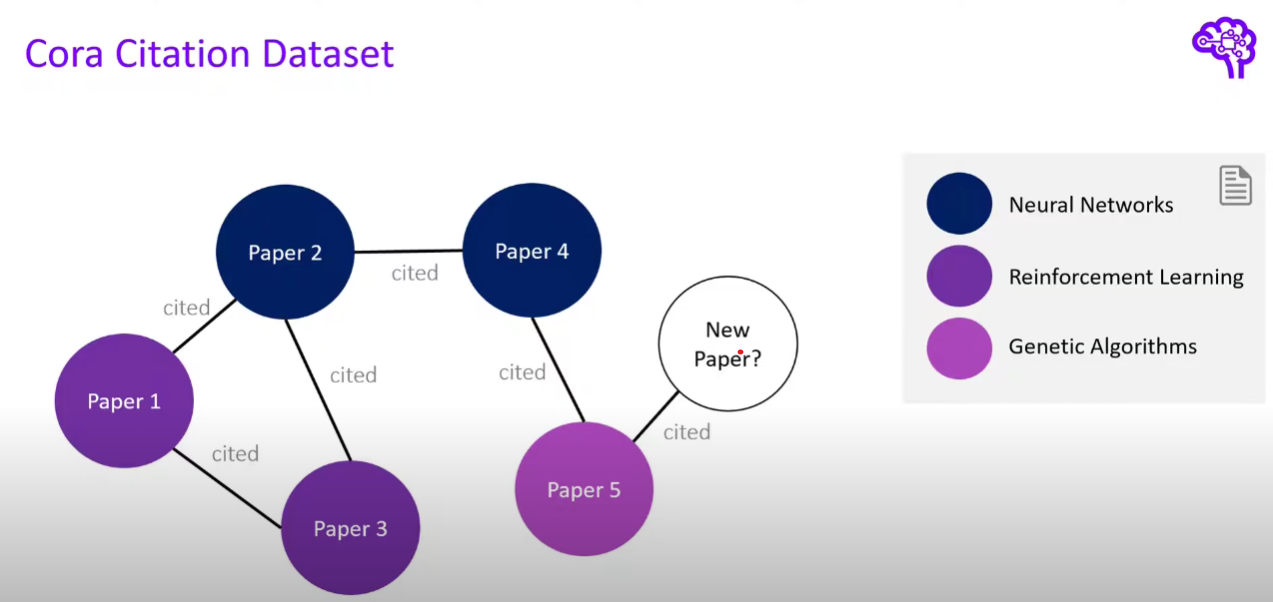

- Visualization of the cora dataset
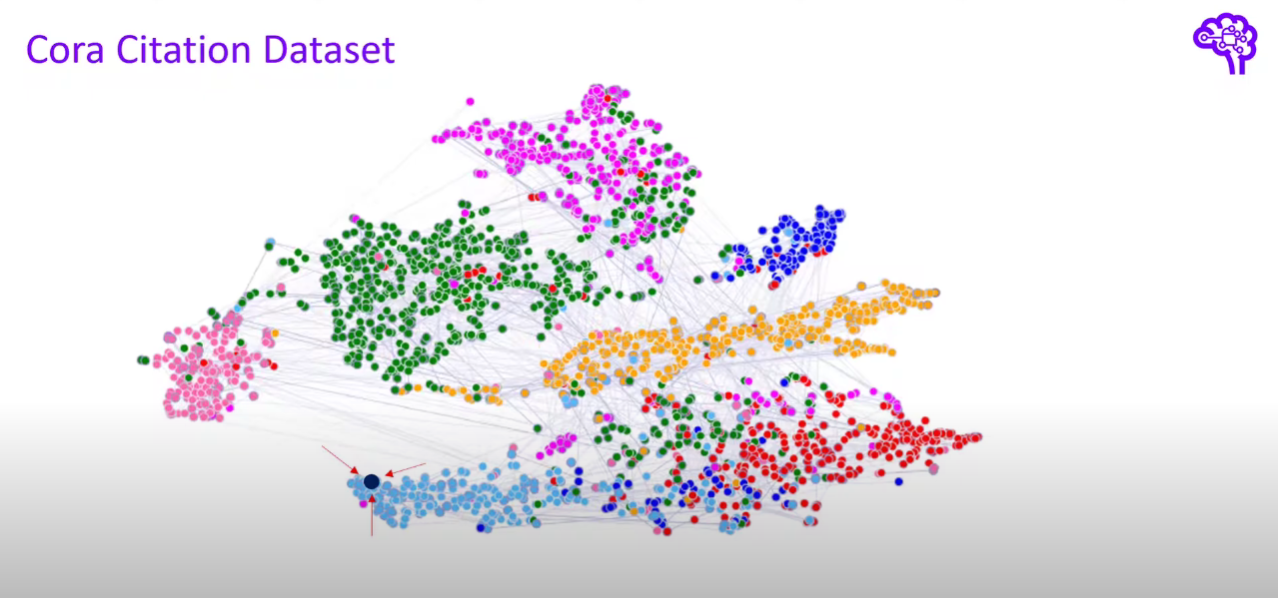

- Lets look at how the node features of each publication look like.
- The representation that is used is called bag of words. This essentialy just means number of occurences of a specific word in each of the publications.
- In case of the cora dataset this consist 1433 words which are usually called the dictionary.
- For example we can count how many times the word 'neural', 'network', 'ReLu', 'Reinforcement' and so on occur.
- This will then be a pretty good representation of the content within each paper. 
- We apply some sort of normalization and then we end up with a no feature vector for each publication in our graph.

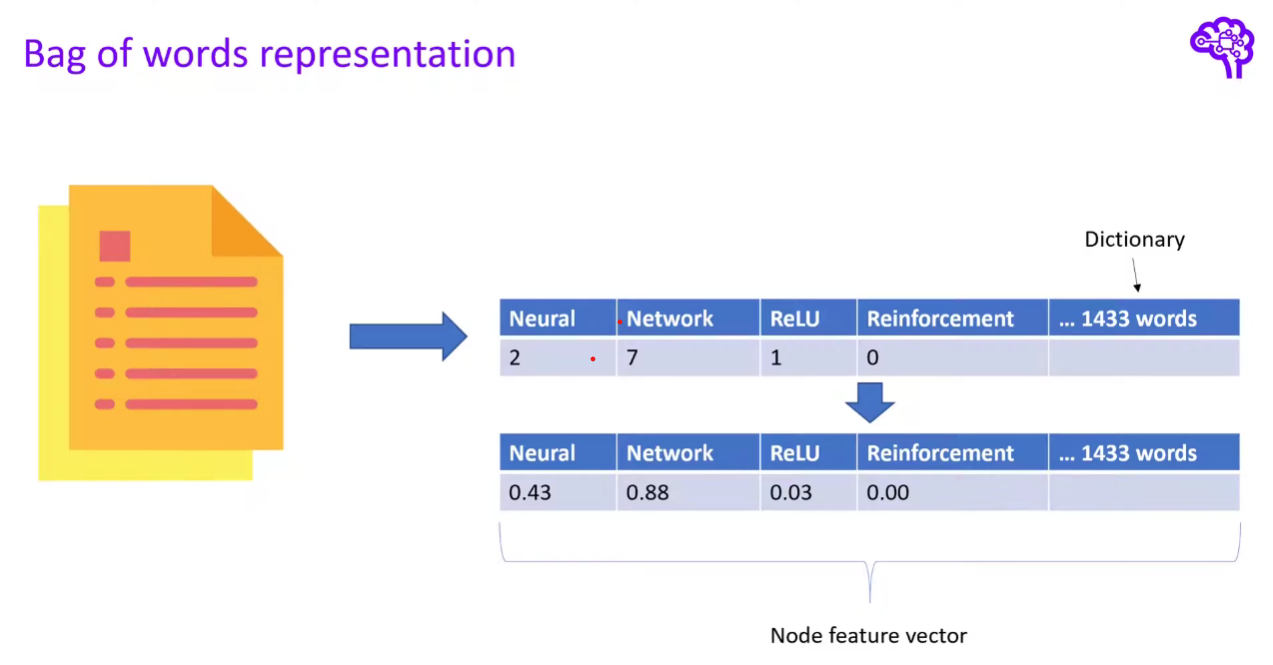

- We also have this word vector for the unclassified node which we want to predict its label.
- After several message passing steps in Graph Neural Network we will end up node embeddings that contains the knowledge about the other nodes and the connections in the graph.


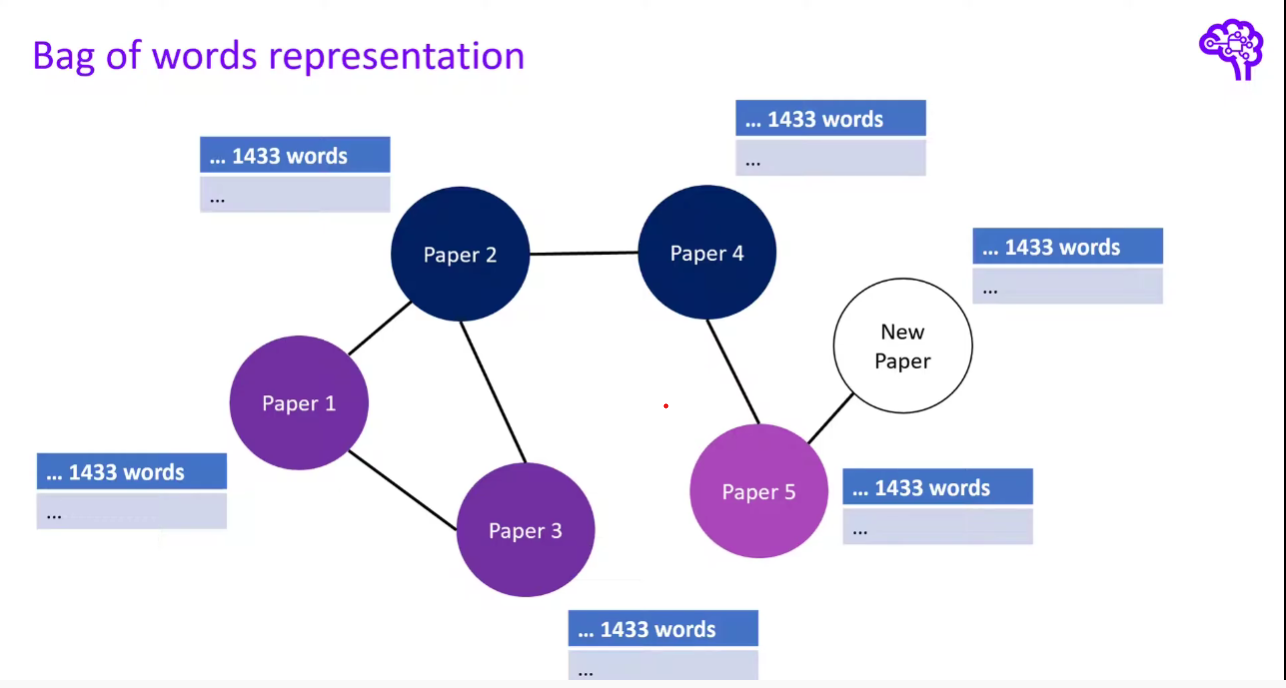

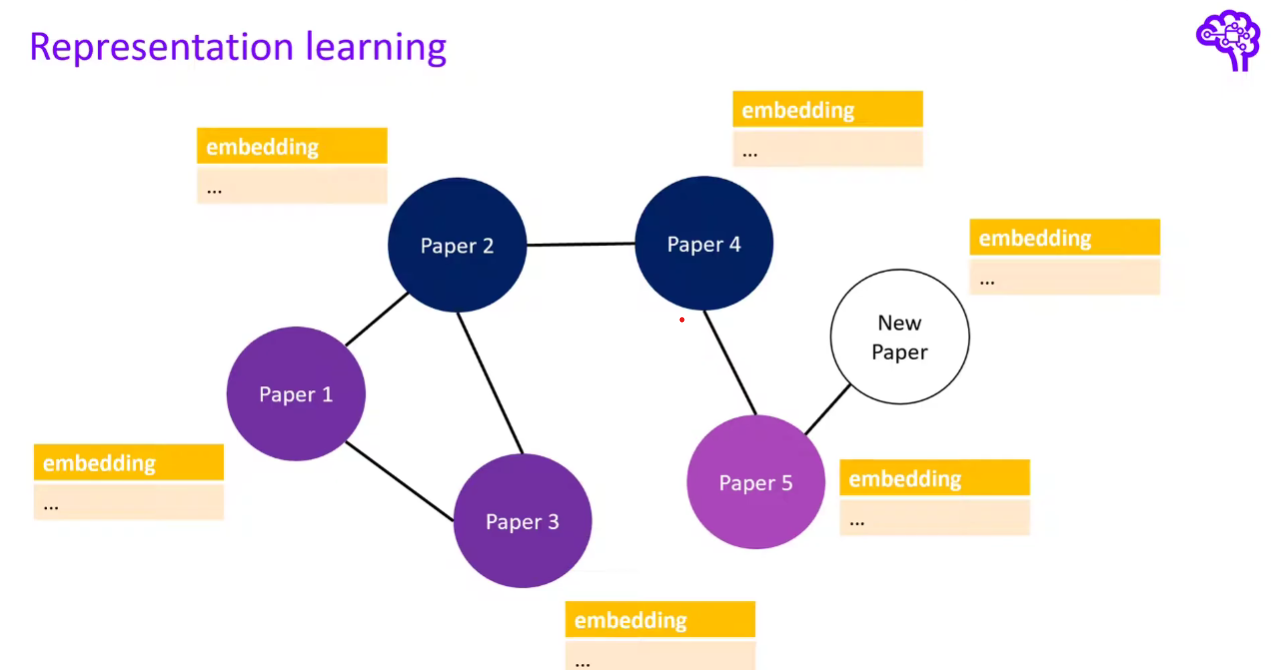

- Eventually we can use the embedding of the unlabeled node and predict the publication type with it. 

- This is possible because the embedding tells us everything we need to know such as the content of this paper, its citation network and eventually content of the other papers.
- In this example our predicted class is 'genetic algorithm'

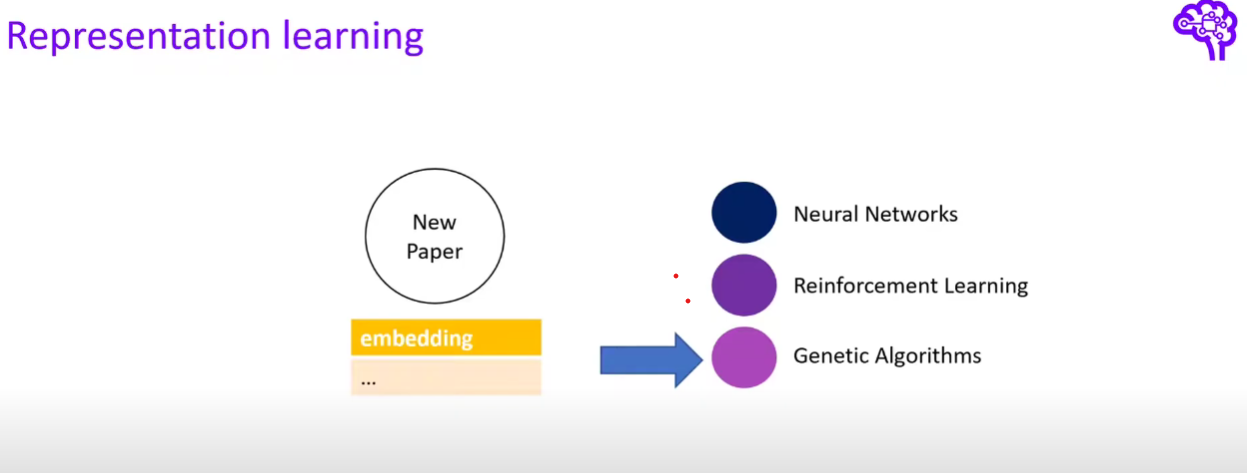

### LETS IMPLENT THIS

In [2]:
from torch_geometric.datasets import Planetoid
from torch_geometric.transforms import NormalizeFeatures

In [3]:
# Normalize the features of node, this algorithm comes from torch_geometric.transforms
dataset = Planetoid(root='data/Planetoid', name='Cora', transform=NormalizeFeatures())

In [4]:
# Get some basic info about the dataset
print(f'Number of graphs: {len(dataset)}')
print(f'Number of features: {dataset.num_features}')
print(f'Number of classes: {dataset.num_classes}')
print(50*'=')

# There is only one graph in the dataset, use it as new data object
data = dataset[0]  

# Gather some statistics about the graph.
print(data)
print(type(data))
print(f'Number of nodes: {data.num_nodes}')
print(f'Number of edges: {data.num_edges}')
print(f'Number of training nodes: {data.train_mask.sum()}')
print(f'Training node label rate: {int(data.train_mask.sum()) / data.num_nodes:.2f}')
print(f'Is undirected: {data.is_undirected()}')

Number of graphs: 1
Number of features: 1433
Number of classes: 7
Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])
<class 'torch_geometric.data.data.Data'>
Number of nodes: 2708
Number of edges: 10556
Number of training nodes: 140
Training node label rate: 0.05
Is undirected: True


- We only have a relatively small set of training nodes (20 nodes per class)
- 140 nodes have labels and we will use them for predict rest of the nodes(2708-140)
- 140 labeled nodes will be used to predict labels of 2568 nodes.
- There are binary test, train and validation masks of the size #nodes (they tell use which node can be used for which task)

mask: Binary masks
### Binary Masks
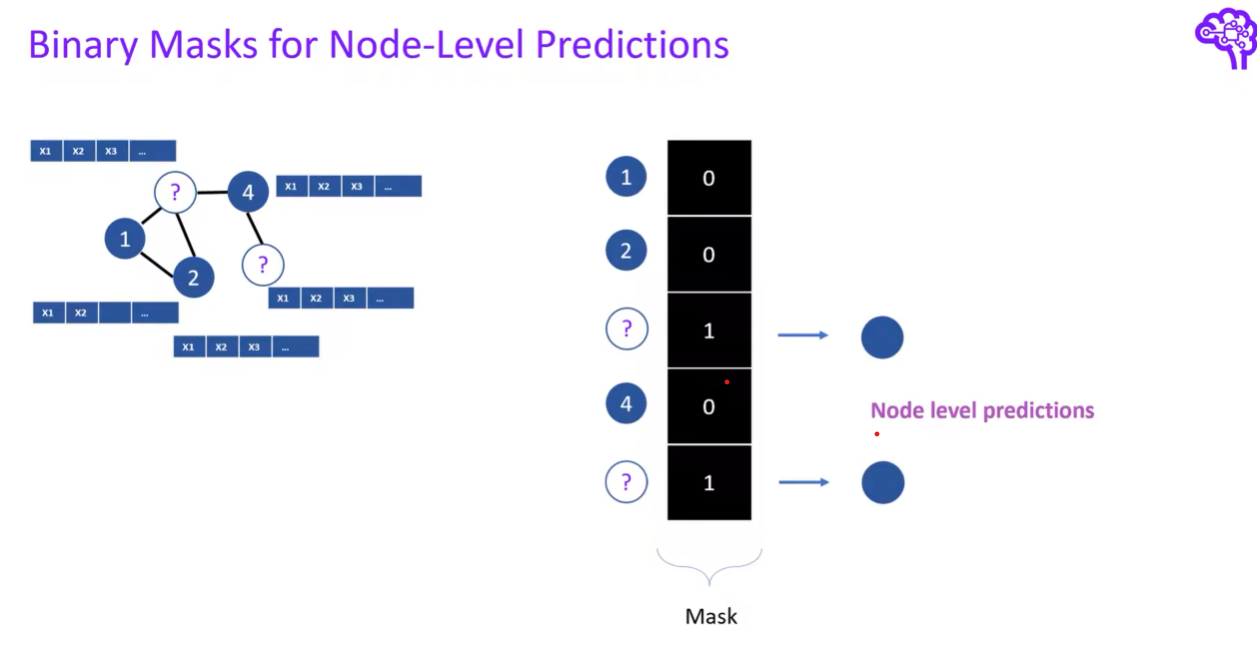
- We have unlabeled nodes which we want to perform predictions
- In our case we have publications with an unknow document type(label)
- This means we don't have labels for the training available for these nodes .
- They need to be masked out during the training and masked in during the prediction.
- This can be done using the masked vectors in PyTorch geometrich which are boolean vectors so either true or false.


#### How the node features look like?
- Node Features: Normalized Word Vectors

In [5]:
print(data.x.shape) # 2708 row(nodes), 1433 columns(features)

# 100 features of the total 1433 features of the 1st node(1st publication in the graph)
data.x[0][:100]

torch.Size([2708, 1433])


tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.1111, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.1111, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000])

 Cant we simply use this tensor to predict?
- Apparently, simple MLP models perform a lot worse than GNNs on this type of task, as the citation information is crucial for a correct classification

How do the labels look like?
- They are encoded as numeric value between 0-6

In [6]:
data.y

tensor([3, 4, 4,  ..., 3, 3, 3])

Binary Mask Information

In [7]:
data.test_mask

tensor([False, False, False,  ...,  True,  True,  True])

Edge Connection Information

In [8]:
data.edge_index.shape

torch.Size([2, 10556])

In [9]:
data.edge_index

tensor([[   0,    0,    0,  ..., 2707, 2707, 2707],
        [ 633, 1862, 2582,  ...,  598, 1473, 2706]])

We have tuples of connections
- node 0 connected to 633
- node 0 connected to 1862
- node 2707 connected to 598
- node 2707 connected to 1473
- ...

In [10]:
# Transpose to see easily
data.edge_index.t()

tensor([[   0,  633],
        [   0, 1862],
        [   0, 2582],
        ...,
        [2707,  598],
        [2707, 1473],
        [2707, 2706]])

## Graph Neural Network for Node Classification
- We will simply build a PyTorch model but the only difference is that we use the 'GCN Layer' (This is the Graph Convolutional Layer which will perform the message passing)


In [11]:
import torch
from torch.nn import Linear
import torch.nn.functional as F
from torch_geometric.nn import GCNConv #GATConv


In [12]:

class GCN(torch.nn.Module):
    # __init__ : Initialize layers, we use 2 GCN layer and 1 linear output layer and that outputs are probabilities
    # for our 7 classes(labels). So, basically if its %100 sure that it's class number 3, we will have at position three
    # value of 1.
    def __init__(self, hidden_channels):
        super(GCN, self).__init__()
        torch.manual_seed(42)

        # Initialize the layers
        self.conv1 = GCNConv(dataset.num_features, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, hidden_channels)
        self.out = Linear(hidden_channels, dataset.num_classes)

    # forward: We pass our input which is node fature or node embedding as well as the edge information to our
    # two convolutional layers.
    def forward(self, x, edge_index):
        # First Message Passing Layer (Transformation)
        x = self.conv1(x, edge_index) # Pass information 
        x = x.relu() # Apply activation function 
        x = F.dropout(x, p=0.5, training=self.training) # Apply dropouts, these droputs will only be applied 
        # during the training, so we don't lose information when performing predictions.
        
        # Second Message Passing Layer
        x = self.conv2(x, edge_index)
        x = x.relu()
        x = F.dropout(x, p=0.5, training=self.training)

        # Output layer 
        # Softmax generates probabilities, squeeze our values between 0 and 1. And the summation of all outputs 
        # equal to 1. 
        x = F.softmax(self.out(x), dim=1)
        return x

model = GCN(hidden_channels=16)
print(model)

GCN(
  (conv1): GCNConv(1433, 16)
  (conv2): GCNConv(16, 16)
  (out): Linear(in_features=16, out_features=7, bias=True)
)


## Training and Evaluation

In [13]:
# Initialize model
model = GCN(hidden_channels=16)

# Use GPU, "cuda:0" if torch.cuda.is_available() else "cpu"
device = torch.device("cpu")
model = model.to(device)
data = data.to(device)

# Initialize Optimizer
learning_rate = 0.01
decay = 5e-4
optimizer = torch.optim.Adam(model.parameters(), 
                             lr=learning_rate, 
                             weight_decay=decay)
# Define loss function (CrossEntropyLoss for Classification Problems with 
# probability distributions)
# The cross entropy loss is used to compare distributions. Here we have a probability distribution because of the Softmax.
criterion = torch.nn.CrossEntropyLoss()

def train():
      model.train()
      optimizer.zero_grad() 
      # Use all data as input, because all nodes have node features
      out = model(data.x, data.edge_index)  
    # We pass all data because each of our nodes has a node embedding or node feature vector
    # but when we calculating the loss we apply our train mask 
      # Only use nodes with labels available for loss calculation --> mask
      loss = criterion(out[data.train_mask], data.y[data.train_mask])  
      loss.backward() 
      optimizer.step()
      return loss

def test():
      model.eval()
      out = model(data.x, data.edge_index)
      # Use the class with highest probability.
      pred = out.argmax(dim=1)  
      # Check against ground-truth labels.
      test_correct = pred[data.test_mask] == data.y[data.test_mask]  
      # Derive ratio of correct predictions.
      test_acc = int(test_correct.sum()) / int(data.test_mask.sum())  
      return test_acc

losses = []
for epoch in range(0, 1001):
    loss = train()
    losses.append(loss)
    if epoch % 100 == 0:
      print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}')

Epoch: 000, Loss: 1.9461
Epoch: 100, Loss: 1.8390
Epoch: 200, Loss: 1.7540
Epoch: 300, Loss: 1.5722
Epoch: 400, Loss: 1.4239
Epoch: 500, Loss: 1.3926
Epoch: 600, Loss: 1.3943
Epoch: 700, Loss: 1.4031
Epoch: 800, Loss: 1.3997
Epoch: 900, Loss: 1.3786
Epoch: 1000, Loss: 1.3366


### Visualize the training loss

C:\Users\Umut\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

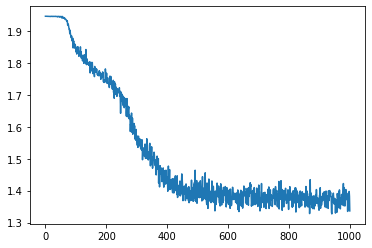

In [14]:
import seaborn as sns
losses_float = [float(loss.cpu().detach().numpy()) for loss in losses] 
loss_indices = [i for i,l in enumerate(losses_float)] 
plt = sns.lineplot(loss_indices, losses_float)
plt

### Calculate test metric

In [15]:
test_acc = test()
print(f'Test Accuracy: {test_acc:.4f}')

Test Accuracy: 0.7100


torch.Size([2708, 7])


<AxesSubplot:>

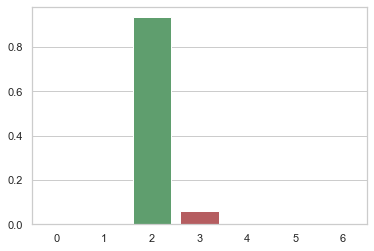

In [16]:
import seaborn as sns
import numpy as np
sample = 9
sns.set_theme(style="whitegrid")
print(model(data.x, data.edge_index).shape)
pred = model(data.x, data.edge_index)
sns.barplot(x=np.array(range(7)), y=pred[sample].detach().cpu().numpy())

### Visualizing the embeddings

In [17]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import numpy as np

def plt2arr(fig):
    rgb_str = fig.canvas.tostring_rgb()
    (w,h) = fig.canvas.get_width_height()
    rgba_arr = np.fromstring(rgb_str, dtype=np.uint8, sep='').reshape((w,h,-1))
    return rgba_arr


def visualize(h, color, epoch):
    fig = plt.figure(figsize=(5,5), frameon=False)
    fig.suptitle(f'Epoch = {epoch}')
    # Fit TSNE with 2 components
    z = TSNE(n_components=2).fit_transform(out.detach().cpu().numpy())

    # Create scatterplot from embeddings
    plt.xticks([])
    plt.yticks([])
    plt.scatter(z[:, 0], 
                z[:, 1], 
                s=70, 
                c=color.detach().cpu().numpy(), 
                cmap="Set2")
    fig.canvas.draw()

    # Convert to numpy
    return plt2arr(fig)


# Reset the previously trained model weights
for layer in model.children():
   if hasattr(layer, 'reset_parameters'):
       layer.reset_parameters()

TSNE Visualization finished.


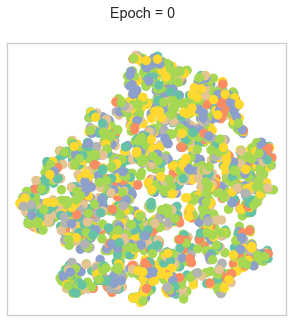

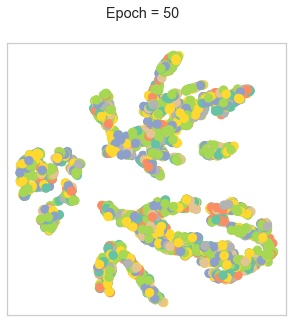

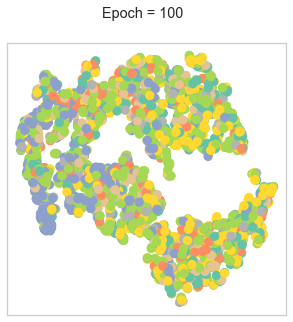

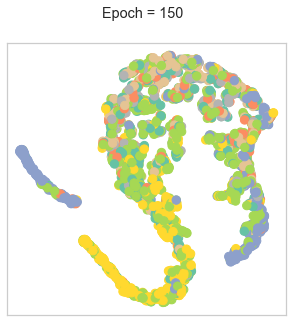

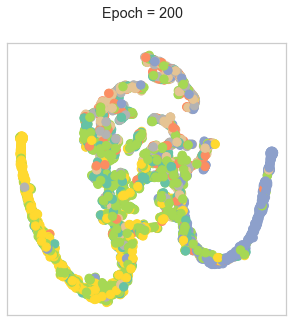

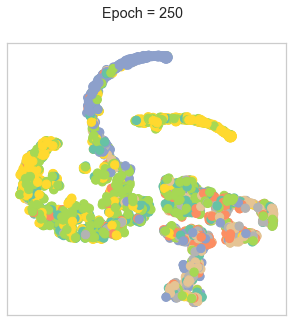

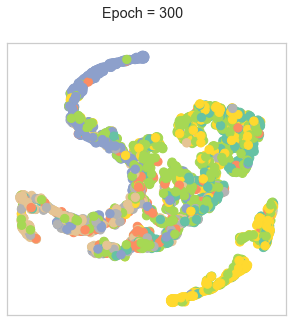

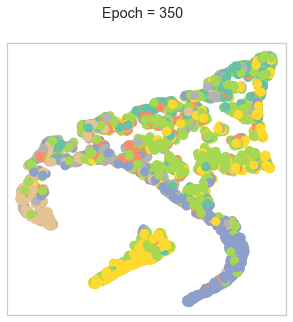

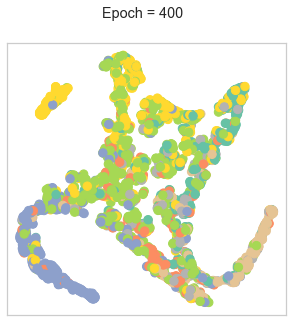

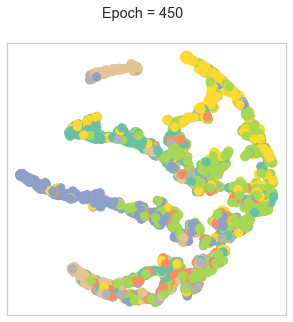

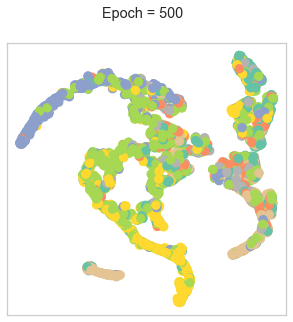

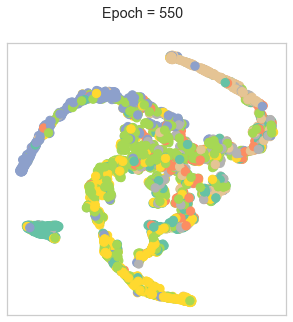

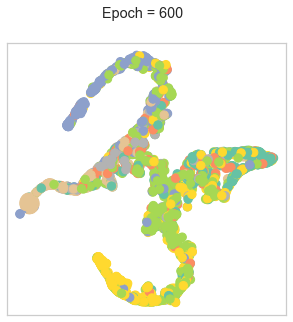

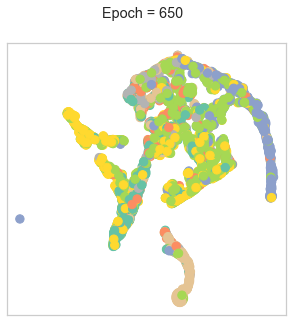

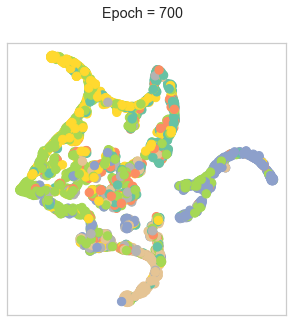

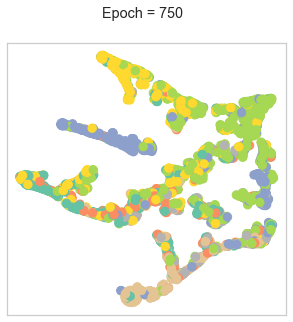

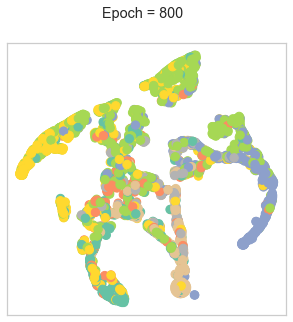

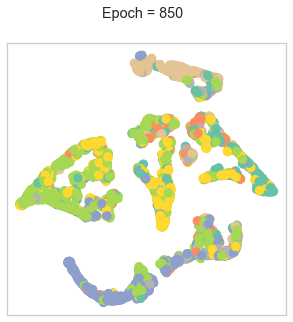

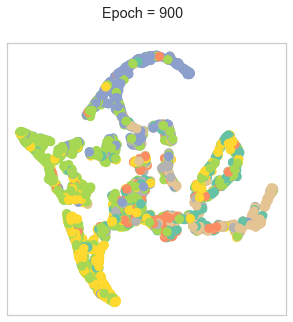

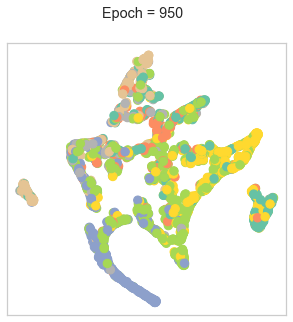

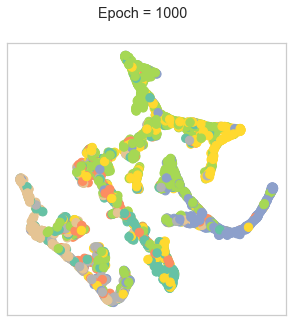

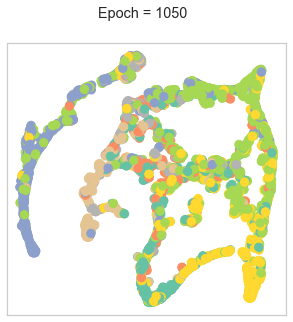

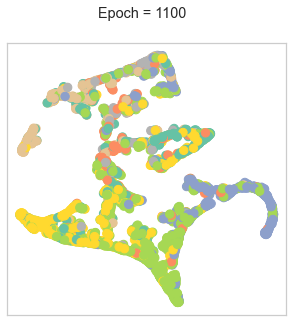

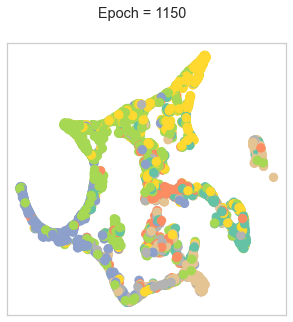

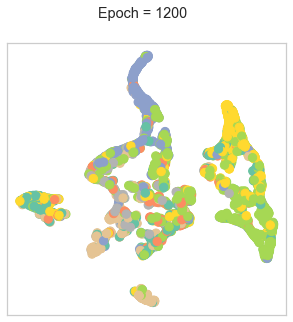

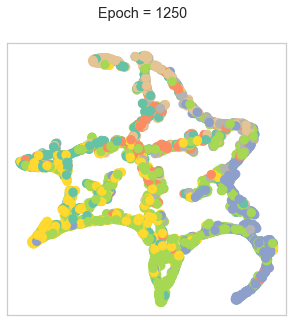

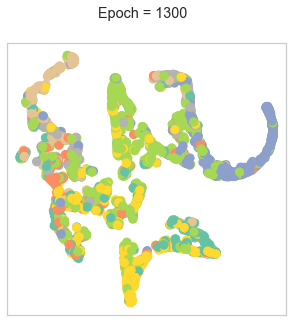

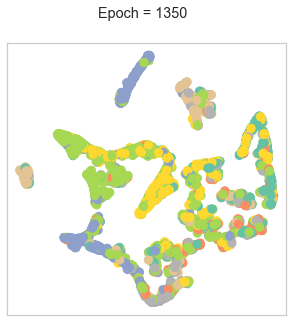

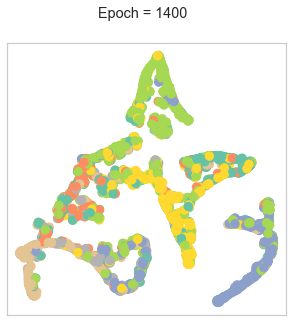

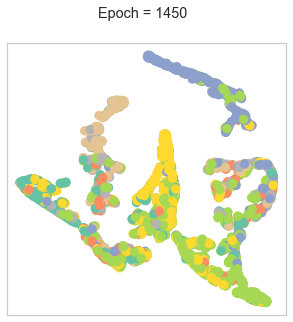

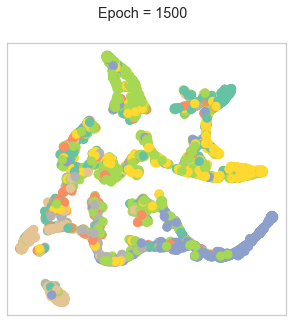

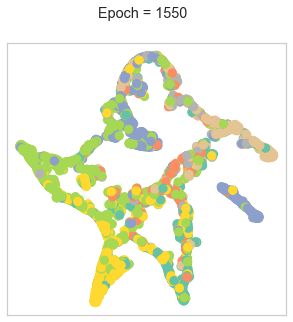

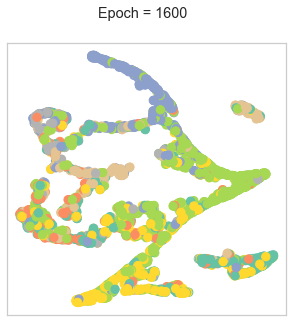

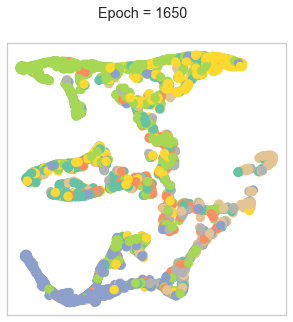

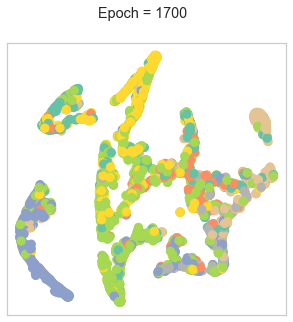

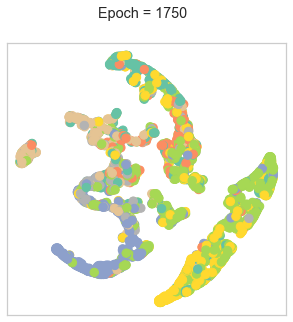

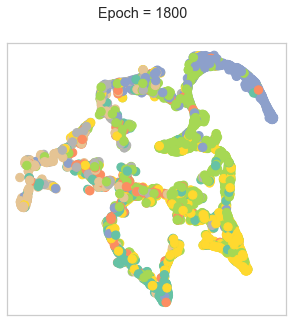

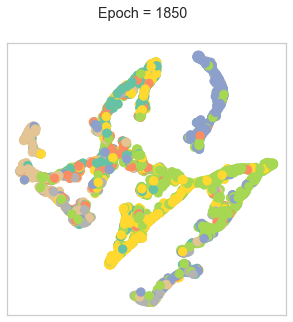

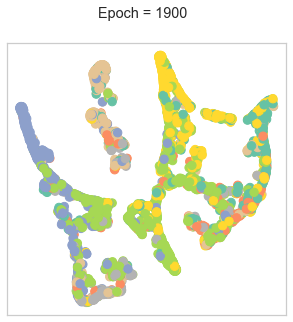

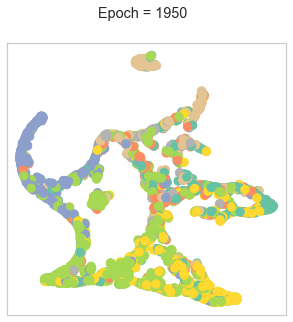

In [18]:
# Ignore deprecation warnings here
import warnings
warnings.filterwarnings('ignore')

# Train the model and save visualizations
images = []
for epoch in range(0, 2000):
    loss = train()
    if epoch % 50 == 0:
      out = model(data.x, data.edge_index)
      images.append(visualize(out, color=data.y, epoch=epoch))
print("TSNE Visualization finished.")